In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations

In [28]:
df = pd.read_csv('nearby_amenities.csv', dtype={'RegionName':'str'}).rename(columns={'2024-08-31':'rental_price'})
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,rental_price,num_restaurant,num_bank,num_fast_food,num_cafe,num_place_of_worship,num_school,num_bicycle_rental,has_features
0,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,1855.383088,817,118,684,183,930,76,41,True
1,95992,10,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2514.250000,2034,191,1158,615,713,343,126,True
2,84630,12,60629,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1244.958333,1999,204,903,711,933,295,865,True
3,96361,14,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,3800.000000,2034,191,1158,615,713,343,126,True
4,74101,15,37013,zip,TN,TN,Nashville,"Nashville-Davidson--Murfreesboro--Franklin, TN",Davidson County,1738.937689,283,27,173,68,759,193,11,True


In [29]:
features = ['num_restaurant', 'num_bank','num_fast_food','num_cafe','num_place_of_worship','num_school','num_bicycle_rental']
y = df['rental_price']


In [30]:
best_model = None
best_score = float('inf')
best_features = None

for i in range(1, len(features) + 1):
    for subset in combinations(features, i):
        X = df[list(subset)]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        
        if mse < best_score:
            best_model = model
            best_score = mse
            best_r2 = r2_score(y_test, y_pred)
            best_features = subset

print(f"Best MSE: {best_score}")
print(f"Best feature subset: {best_features}")

print("Best model coefficients:", best_model.coef_)

Best MSE: 403134.0141684104
Best feature subset: ('num_restaurant', 'num_bank', 'num_fast_food', 'num_cafe', 'num_place_of_worship', 'num_school', 'num_bicycle_rental')
Best model coefficients: [-2.86378159 12.1025419   1.64670514  5.36348364 -1.45079325  2.73177781
 -1.50486123]


In [31]:
print("Best R2 Score:", best_r2)

Best R2 Score: 0.4245050842389767


In [33]:
X = X[list(best_features)]

In [34]:
actual_rental_prices = y
predicted_rental_prices = model.predict(X)

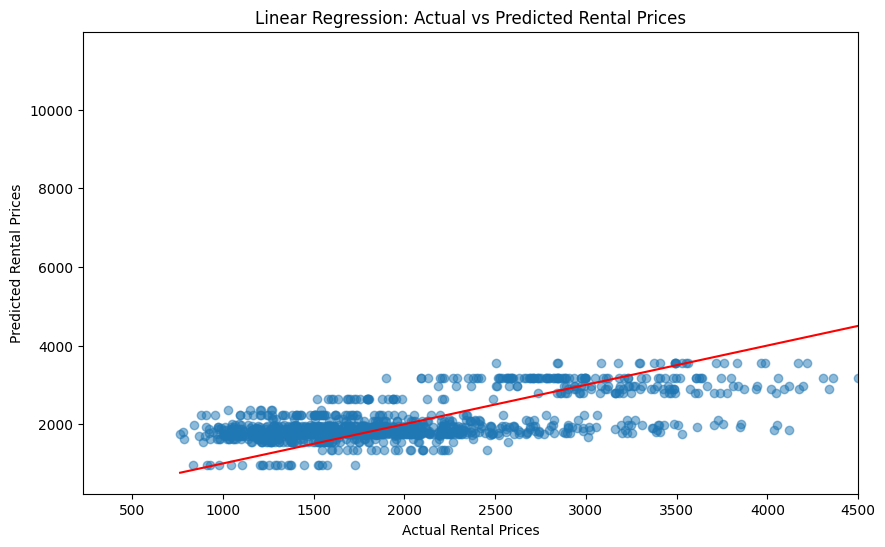

In [36]:
import matplotlib.pyplot as plt

# Assuming you have the actual and predicted rental prices from your linear regression model
plt.figure(figsize=(10,6))
plt.scatter(actual_rental_prices, predicted_rental_prices, alpha=0.5)
plt.plot([min(actual_rental_prices), max(actual_rental_prices)], [min(actual_rental_prices), max(actual_rental_prices)], color='red')  # Line of perfect prediction
plt.xlim(right=4500)
plt.xlabel('Actual Rental Prices')
plt.ylabel('Predicted Rental Prices')
plt.title('Linear Regression: Actual vs Predicted Rental Prices')
plt.savefig('linear_regression_rental_price.png')

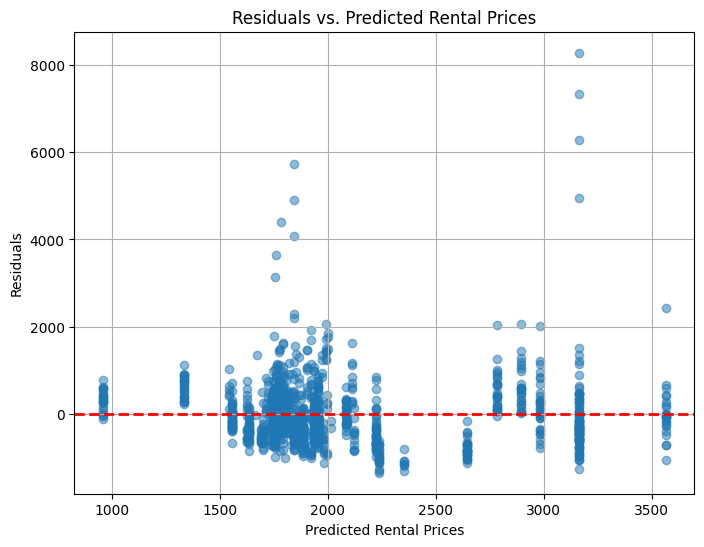

In [40]:
residuals = actual_rental_prices - predicted_rental_prices
plt.figure(figsize=(8, 6))
plt.scatter(predicted_rental_prices, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Rental Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Rental Prices')
plt.grid(True)
plt.show()